In [3]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [37]:
%%cython --annotate
#import numpy as np
cdef pi=3.141592653589793
#https://saoghal.net/articles/2020/faster-numerical-integration-in-scipy/
from libc.math cimport sqrt, exp, sin, cos
from scipy.integrate import quad
import numpy as np
cdef dt,t0,A
dt=1
t0=0
A=1
cdef double b(o):
    return A/(pi*o)*(sin(o*(t0+dt/2))-sin(o*(t0-dt/2)))
cdef double f(t):
    return quad(lambda x: b(x)*cos(t*x),0,np.inf,limit=50)


<ipython-input-41-d54f5fd10a5f>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  y=[f(t)[0] for t in t]
<ipython-input-41-d54f5fd10a5f>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y=[f(t)[0] for t in t]


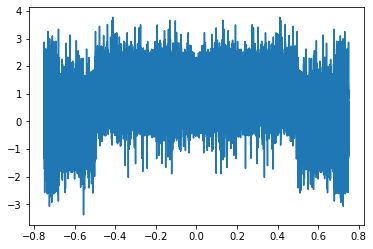

In [41]:
t=np.linspace(-dt*0.75,dt*0.75,int(1e6))
y=[f(t)[0] for t in t]
plt.plot(t,y)

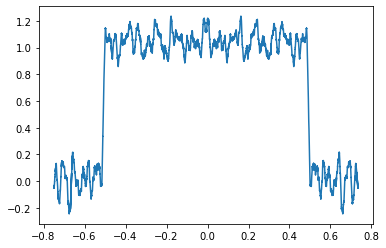

In [47]:
sm=10000
plt.plot(t[:-sm],[np.mean(y[i:i+sm]) for i in range(len(y)-sm)])
plt.savefig("avg.pdf")